# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core.Shape
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:54: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr.dtype, jax.dtypes.prng_key) for runtime detection of typed prng keys (i.e. keys created with jax.random.key).
For more information, see https://jax.readthedocs.io/en/latest/jep/9263-typed-keys.html
  PRNGKey = jax.random.KeyArray
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scib_metrics/_types.py:9: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.i

In [2]:
model = scPrint.load_from_checkpoint(
    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

RuntimeError caught: scPrint is not attached to a `Trainer`.



In [7]:
model.normalization = "sum"

In [4]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [5]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

100%|██████████| 54/54 [01:48<00:00,  2.02s/it]


base enrichment
Top central genes: []
The DataFrame contains only the same values.


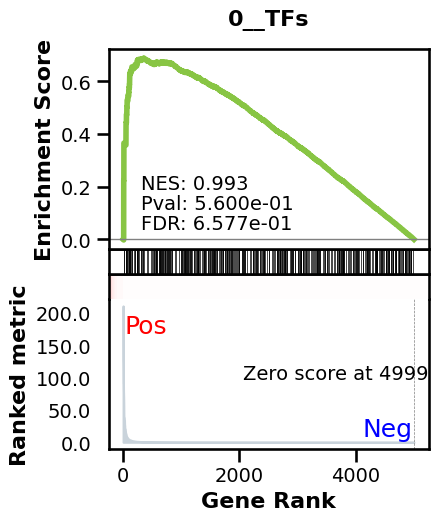

_________________________________________
TF specific enrichment
found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822


 98%|█████████▊| 125/128 [00:02<00:00, 51.74it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:752: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 50.73it/s]


Area Under Precision-Recall Curve (AUPRC):  0.000876341582078115
EPR: 2.6620469453287052


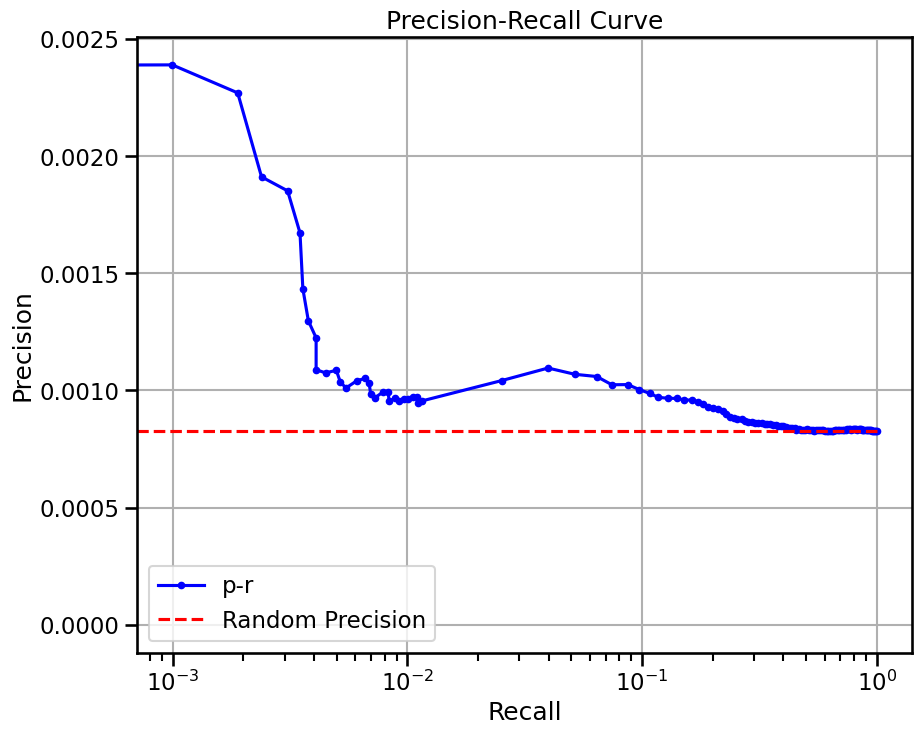

train classifier
true elem 10028 ...
doing classification....


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:315: RuntimeWarning: invalid value encountered in long_scalars
  "precision": (pred[y_test == 1] == 1).sum() / (pred == 1).sum(),


metrics {'used_heads': 0, 'precision': nan, 'random_precision': 0.0007315712325265797, 'recall': 0.0, 'predicted_true': 0.0, 'number_of_true': 3552.0}


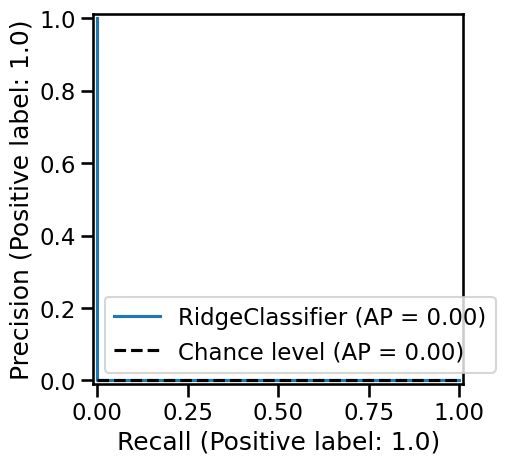

/tmp/ipykernel_767231/1975962309.py:43: RuntimeWarning: Mean of empty slice.
  grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


scprint_benchmark2
base enrichment
Top central genes: []
The DataFrame contains only the same values.


/home/ml4ig1/Documents code/GRnnData/grnndata/utils.py:325: DeprecationWarning: invalid escape sequence '\m'
  """


AssertionError: 

In [8]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    #grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
    #                     how="random expr",
    #                     preprocess="softmax",
    #                     head_agg='mean',
    #                     filtration="none",
    #                     forward_mode="none",
    #                     organisms=['NCBITaxon:9606','NCBITaxon:10090'],
    #                     num_genes=2200,
    #                     max_cells=MAXCELLS,
    #                     doplot=False,
    #                     batch_size=32,
    #                     )
    #grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    #grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    #metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    #del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='none',
                         filtration="none",
                         forward_mode="none",
                         num_genes=NUM_GENES,
                         max_cells=1024,
                         doplot=False,
                         batch_size=16,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        print("train classifier")
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    print("scprint_benchmark2")
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [11]:
metrics

{'kidney distal convoluted tubule epithelial cell_scprint': {'significant_enriched_TFtargets': 0.0,
  'precision': 0.0008261540535098696,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.0010160466196394518,
  'epr': 1.20712304595589},
 'kidney distal convoluted tubule epithelial cell_scprint_class': {'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells'],
  'significant_enriched_TFtargets': 2.9411764705882355,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.00079320715326562,
  'epr': 2.9052129647940905},
 'kidney loop of Henle thick ascending limb epithelial cell_scprint': {'significant_enriched_TFtargets': 0.0,
  'precision': 0.0008335038149911712,
  'recall': 1.0,
  'rand_precision': 0.0008337384212719915,
  'auprc': 0.0009425883451413699,
  'epr': 1.2286237663524646},
 'kidney loop of Henle thick ascending limb epithelial cell_scprint_class': {'significant_enriched_TFtargets': 15.384

In [15]:
import pandas as pd

In [18]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,tools,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,scprint,kidney distal convoluted tubule epithelial cell,1.207123,0.001016,0.000826,0.000000,False,False
1,class,kidney distal convoluted tubule epithelial cell,2.905213,0.000793,0.000826,2.941176,False,False
2,scprint,kidney loop of Henle thick ascending limb epit...,1.228624,0.000943,0.000834,0.000000,False,False
3,class,kidney loop of Henle thick ascending limb epit...,0.613682,0.000743,0.000834,15.384615,False,False
4,scprint,kidney collecting duct principal cell,0.611382,0.001623,0.001259,3.125000,True,False
5,class,kidney collecting duct principal cell,1.122309,0.001259,0.001259,7.812500,False,False
6,scprint,mesangial cell,2.092175,0.001877,0.001044,9.375000,False,False
7,class,mesangial cell,2.559589,0.001125,0.001044,28.125000,False,False
8,scprint,blood vessel smooth muscle cell,2.859037,0.002531,0.001573,5.454545,False,False
9,class,blood vessel smooth muscle cell,1.066141,0.001694,0.001573,10.909091,False,False
